
# Project: Investigate TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I'll be analysing the TMDb movies dataset, which contains multiple informations like the movie cast, prodution companies, release date ..., in order to find out what properties are associated with higher revenue movies.
>


In [343]:
#Importing all necessary packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> First, I will document myself on the columns of the dataset in order to know :<br>
>1. which columns are necessary for the analysis and which are not
>2. the datatypes of the columns.
>3. which columns have multiple values cells if any.
>4. which columns might have errant data.<br>

> Also, I might need to add columns to extract informations from other columns.

### General Properties

In [344]:
#Loading the data into df
df = pd.read_csv("tmdb-movies.csv")

#Printing the first rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


1.  At first sight, columns like : 
    -  id
    -  imdb_id
    -  original_title
    -  homepage
    -  tagline 
    -  overview
    -  runtime
    -  vote_count<br>

    are not likely to be used in the analysis since they are very specific to their movie, so they will be droped.<br><br>
2. Also budget and revenue will be droped because they do not account for inflation.<br><br>

3. And finally 
    -  cast
    -  keywords
    -  genres 
    -  production_companies <br>
    
    have multiple values cells separated by '|'

In [345]:
#Droping useless columns
toBeDroped = ["id", "imdb_id", "original_title", "homepage", "tagline", "overview", "runtime", "vote_count", "budget", "revenue"]
df.drop(toBeDroped, axis=1, inplace=True)


In [346]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 933.9+ KB


>As it can be seen in the previous code cell, there are missing data among the following columns:
-  cast
-  director
-  keywords
-  genres 
-  production_companies <br>
>
>But since these columns have multiple values per cell,
>it is better to duplicate the concerned rows for each value in order to find a way of handling their missing data.<br>
>Other than that, the datatypes all seem adequate to the values.

In [347]:
df.describe()


,popularity,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Something else I noticed is that there are a lot of rows with revenue_adj equal to 0 (at least 50%), which are most likely errant data,


>As a last step, I will add a column containing the month of release, as I suspect that the time of the year when the movie is released might have an effect on it's revenue 

In [348]:
df["release_month"] = df["release_date"].apply(lambda x: x.split("/")[0])
df.head()


,popularity,cast,director,keywords,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,4


### Summary

1. 8 columns were droped because they're not usefull to this analysis.
2. 2 columns (budget and revenue) were droped because they do not account for inflation.
3. 4 columns with multiple values cells separated by pipes
4. 5 columns with missing data (4 of them have multiple values cells)
5. At least 50% of the revenue_adj data are errant (equal to 0)
6. Added release_month column



### Resolving the stated issues  

I will start by dealing with the errant data, the best , I think, is to drop the concerned rows and only keep consistent ones even though the number of rows to drop is very important.

In [349]:
#Number of rows Before droping the rows with errant data
before = df.shape[0]

before

10866

In [350]:
#Droping the rows where revenu_adj = 0

df = df[df.revenue_adj > 0]
df.describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,1.045109,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,1.356628,0.798795,11.569192,4.375672e+07,1.988419e+08
min,0.001117,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387754,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,0.680289,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,1.210457,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,32.985763,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [351]:
#After droping rows with errant data
after = df.shape[0]

#percentage of remaining rows
after / before * 100

44.634640161973124

The number of rows went from 10866 to 4850, so only 44.63% of the rows are remaining.

Now that the apparent errant data has been dealt with, I will work on the multiple values columns by using the function defined below to get a new copy of the dataframe for each concerned column.

In [352]:
def separateMultipleValuesCells (df, col, newColName, sep= "|"):
    
    """This function takes as input a Dataframe(df) and a column name (col) which has multivalues cells separated with sep,
    and returns a new Dataframe with single values cells(duplicates rows for each value in the multivalued cells)  .
    
    newColName: a new name for the column to be processed
    
    """
    
    tmp = df[col].str.split(sep).apply(pd.Series)
    tmp = tmp.merge(df, left_index=True, right_index=True)
    tmp = tmp.drop([col], axis=1)
    tmp = tmp.melt(id_vars= [c for c in df.columns if c != col], value_name= newColName)
    tmp = tmp.drop(["variable"], axis=1)
    return tmp.dropna()

Now, for each column containing multiple values cells, I will get the corresponding dataframe and calculate the number of unique values in this column

In [353]:
#Getting the new dataframe for production_companies, and calculating the number of unique values in it

df_prod_comp = separateMultipleValuesCells(df, "production_companies", "company")
"Number of unique companies  " + str(df_prod_comp.company.nunique())

'Number of unique companies  3752'

In [354]:
#Getting the new dataframe for cast, and calculating the number of unique values in it

df_actor = separateMultipleValuesCells(df, "cast", "actor")
"Number of unique actors  " + str(df_actor.actor.nunique())

'Number of unique actors  7953'

In [355]:
#Getting the new dataframe for keywords, and calculating the number of unique values in it

df_keyword = separateMultipleValuesCells(df, "keywords", "keyword")
"Number of unique keywords  " + str(df_keyword.keyword.nunique())

'Number of unique keywords  5444'

In [356]:
#Getting the new dataframe for genres, and calculating the number of unique values in it

df_genre = separateMultipleValuesCells(df, "genres", "genre")
"Number of unique genres  " + str(df_genre.genre.nunique())

'Number of unique genres  20'

In [357]:
#Same thing for the director column, but no need to use the separateMultipleValuesCells function

"Number of unique directors  " + str(df.director.nunique())

'Number of unique directors  2133'

>The number of unique values of all these columns (except for genres) is very high (they're also very specific to their corresponding movies), so using them in the analysis might be time consuming and lead to difficult to interpret results, this is why they will be droped.


In [358]:
# The multi values columns will be droped from both df and df_genre,
# as df_genre will be used to study the relation between revenue_adj and genre
# and df will used to study the relation between revenu_adj and other variables

df_genre.drop(["production_companies", "cast", "director", "keywords"], axis=1, inplace=True)
df.drop(["production_companies", "cast", "director", "keywords"], axis=1, inplace=True)

In [359]:
#Now df should look like this
df.head()

,popularity,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,4


In [360]:
#And df_genre like this
df_genre.head()

,popularity,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month,genre
0,32.985763,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,6,Action
1,28.419936,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,5,Action
2,13.112507,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,3,Adventure
3,11.173104,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,12,Action
4,9.335014,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,4,Action


Next, I will deal with null values

In [361]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 8 columns):
popularity       4850 non-null float64
genres           4850 non-null object
release_date     4850 non-null object
vote_average     4850 non-null float64
release_year     4850 non-null int64
budget_adj       4850 non-null float64
revenue_adj      4850 non-null float64
release_month    4850 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 501.0+ KB


No need to deal with null values since there aren't any after droping the previous columns<br>

Now, the dataset looks cleaner an is ready to be explored.

<a id='eda'></a>
## Exploratory Data Analysis

Now, to answer the main question which is: what are the properties associated with higher revenue movies ?<br>
I will work on the following properties: vote_average, genre and release_month.


### 1. revenue and Vote average

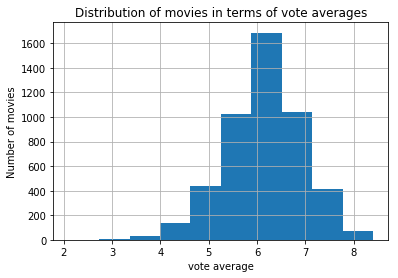

In [362]:
#histogram showing how the movies are distributed in terms of vote averages
df.vote_average.hist();
plt.title("Distribution of movies in terms of vote averages");
plt.xlabel("vote average");
plt.ylabel("Number of movies");

According to the histogram, the majority of the movies receive an average vote between 4.5 and 7.5 approximately (mostly from 5.9 to 6.5), and very few receive average votes outside of this range.<br>
Next, 


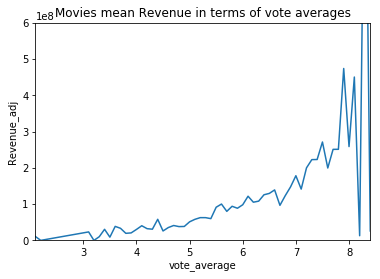

In [363]:
#Ploting revenue_adj in terms of vote_average

df.groupby("vote_average").revenue_adj.mean().plot();
plt.ylabel("Revenue_adj")
plt.title("Movies mean Revenue in terms of vote averages")

#Limiting the max value for revenue to get more detailed plot
plt.ylim(0, 6e+08);

When vote average gets higher the revenue also gets higher, although there are some exceptions around vote average 8.

### 2.  Revenue and genre
First, let's see how the movies are distributed in terms of genre

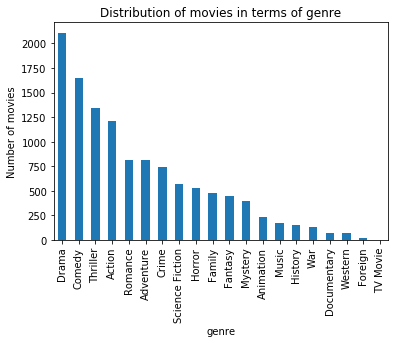

In [364]:
#histogram showing how the movies are distributed in terms of vote averages
df_genre.genre.value_counts().plot(kind="bar");
plt.title("Distribution of movies in terms of genre");
plt.xlabel("genre");
plt.ylabel("Number of movies");

Clearly, most of them are Drama movies (more than 2000), comedy movies(more than 1500) and very few foreign and TV movies(less than 250)

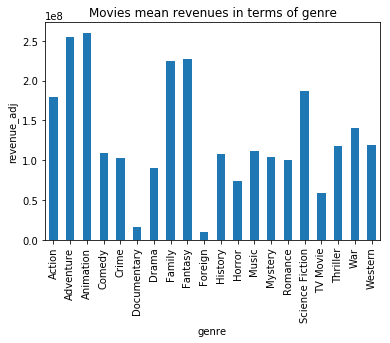

In [365]:
#Histogram showing the mean revenue of movies according to their genres
df_genre.groupby( "genre").revenue_adj.mean().plot(kind="bar");
plt.title("Movies mean revenues in terms of genre");
plt.xlabel("genre");
plt.ylabel("revenue_adj");

According to this histogram, in average, Adventure and Animation movies have the highest revenues followed by Family and Fantasy movies, in the other hand, documentary and foreign movies are the ones with the lowest revenues

### 3.  Revenue and release month
First, let's see how the movies are distributed in terms of release month

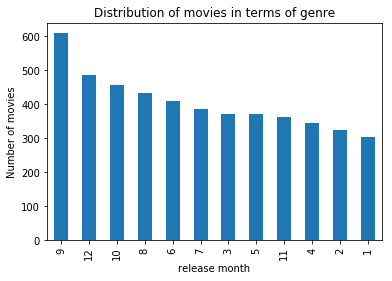

In [366]:
#histogram showing how the movies are distributed in terms of vote averages
df.release_month.value_counts().plot(kind="bar");
plt.title("Distribution of movies in terms of genre");
plt.xlabel("release month");
plt.ylabel("Number of movies");

We can notice that movies tend to be released more between august and december, and less in the beginning of the year.

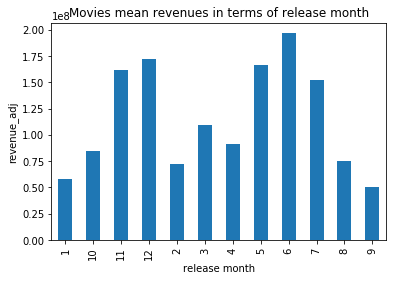

In [367]:

df.groupby( "release_month").revenue_adj.mean().plot(kind="bar");
plt.title("Movies mean revenues in terms of release month");
plt.xlabel("release month");
plt.ylabel("revenue_adj");

We can notice that movies released in June, May, July, November and December have higher mean revenue than those released during the other months

<a id='conclusions'></a>
## Conclusions

As a conclusion to this analysis, I came to an answer to the question :<br>
What properties are associated with higher revenue movies ?<br>

After exploring the TMDb movies dataset and analysing the correlation between the dependant variable "revenue_adj" and the independant variables "vote_average", "release_month" and "genre", I deduced that the following properties are associated with higher revenue movies :

1. movies with high vote average tend to have high revenue.
2. Adventure, Animation, Family and Fantasy movies tend to have high revenue.
3. movies released in June, May, July, November and december seem to have higher revenue as well

As for the limits of this approach, I found it very taxing to drop 55% of the dataset( while cleaning) because the data was errant, I suppose there is much better ways to deal with such cases, also we can't go as far as predicting if a movie will have high revenu or not.


## Sources
1. https://mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas-9849d8ff2401 
2. https://matplotlib.org/tutorials/introductory/pyplot.html 
3. https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib